In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
snacks_df = pd.read_csv('./datasets/snacks.csv', dtype = { 'client_id': str })

In [13]:
snacks_df.head()

,country_region,office_department_city,description,area_name,warehouse_id,warehouse_city,category_id,category_name,brand_id,price_type,...,client_name,point_of_sale_name,distributor,date,units,devolution_units,currency,sale_amount,sale_discount,sale_devolution
0,Centro,Ibague,IBAGUE 1,SALADO,85228.0,IBAGUE,CAT1,Producto de Extrusion,M01,REGULAR,...,NaN,NaN,Tiendas,1/04/2014,39600,0,COP,"493,529.00","-93,769.56",0
1,Sur,Cali,TULUA,EL PRINCIPE,85205.0,TULUA,CAT1,Producto de Extrusion,M01,OFERTADO,...,NaN,NaN,Tiendas,1/04/2014,324,0,COP,"181,530.00","-32,675.40",0
2,Sur,Nariño,POPAYAN,MOTO CONQUISTA POPAYAN,85220.0,POPAYAN,CAT1,Producto de Extrusion,M01,OFERTADO,...,NaN,NaN,Tiendas,1/04/2014,36,0,COP,"20,170.00","-4,437.40",0
3,Sur,Nariño,POPAYAN,MOTO CONQUISTA POPAYAN,85220.0,POPAYAN,CAT1,Producto de Extrusion,M01,REGULAR,...,NaN,NaN,Tiendas,1/04/2014,73200,0,COP,"91,227.00","-20,069.98",0
4,Norte,Bucaramanga,FLORIDA,REPOSO,85230.0,BUCARAMANGA,CAT1,Producto de Extrusion,M01,OFERTADO,...,NaN,NaN,Tiendas,1/04/2014,3924,0,COP,"2,198,533.00","-395,736.97",0


In [14]:
snacks_df['country_region'].unique()

array([' Centro', ' Sur', ' Norte', 'Ventas al Exterior', 'Norte',
       'Centro', nan, 'Sur', 'Ventas Miscelaneas'], dtype=object)

In [15]:
snacks_df['country_region'] = snacks_df['country_region'].str.strip()
snacks_df['country_region'].unique()

array(['Centro', 'Sur', 'Norte', 'Ventas al Exterior', nan,
       'Ventas Miscelaneas'], dtype=object)

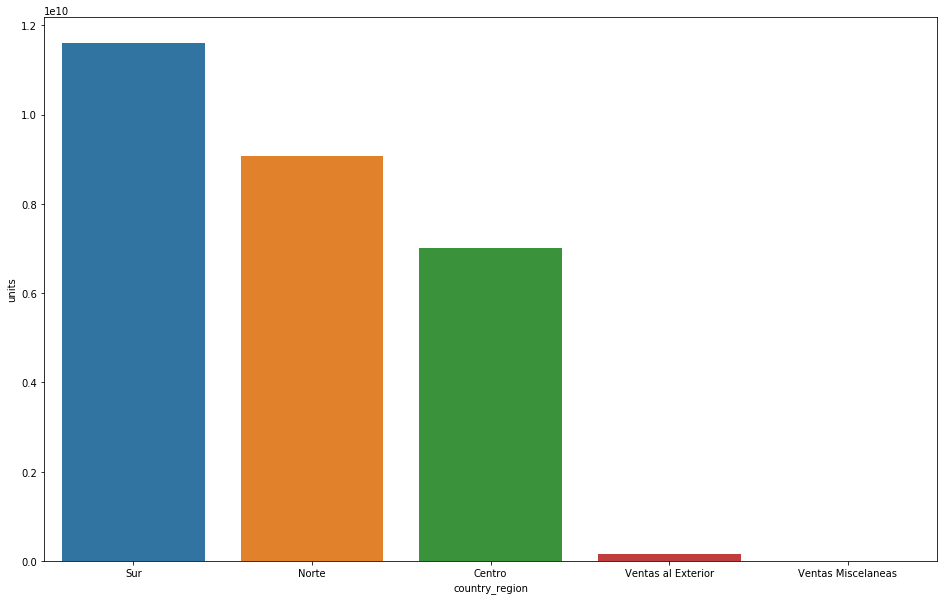

In [28]:
group = snacks_df.groupby('country_region')['units'].sum().reset_index(name='units').sort_values('units', ascending=False)

plt.figure(figsize=(16, 10))
sns.barplot(x='country_region', y='units', data=group)

In [29]:
clean_df = snacks_df[snacks_df['country_region'] == 'Sur']
clean_df.shape

(1213737, 26)

In [38]:
clean_df['category_name'].isna().sum()

101433

In [44]:
clean_df = clean_df.rename(columns={ 'pruduction_line': 'production_line' })
clean_df.columns

Index(['country_region', 'office_department_city', 'description', 'area_name',
       'warehouse_id', 'warehouse_city', 'category_id', 'category_name',
       'brand_id', 'price_type', 'production_line', 'product_id', 'weight',
       'plant', 'client_id', 'flavor_name', 'client_name',
       'point_of_sale_name', 'distributor', 'date', 'units',
       'devolution_units', 'currency', 'sale_amount', 'sale_discount',
       'sale_devolution'],
      dtype='object')

In [71]:
# I want to remove: production_line, warehouse_id, area_name, weight, currency, sale_amount
clean_df = clean_df[clean_df['distributor'].notna()]
clean_df['distributor'].isna().any()

False

In [89]:
clean_df = clean_df.drop([
    'production_line',
    'warehouse_id',
    'area_name',
    'weight',
    'currency',
    'sale_amount',
    'category_id'
], axis=1)
clean_df.shape

(1213721, 19)

In [90]:
clean_df.to_csv('./datasets/clean_snacks.csv', encoding='utf-8', index=False)